<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/Machine_learning_regression/blob/main/car_dekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET: CAR_DEKHO

In [3]:
## ## importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
## reading csv file as dataframe "Data"
data = pd.read_csv("/content/Car details v3.csv")

### checking shape of data:
print(f"data_shape : {data.shape}")

## checking any duplicated
print(f"data_duplicated_value:{data.duplicated().sum()}")
print(f"\ntotal_null_values :\n{data.isnull().sum()}")

data.head(5)

data_shape : (8128, 13)
data_duplicated_value:1202

total_null_values :
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
## all unique values in dataframe:
data.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [6]:
### removeing duplicated data:
data.drop_duplicates(subset=data.columns, inplace=True)
print(f"Duplicated data : {data.duplicated().sum()}")
print(f"df_shape: {data.shape}")
print(data.info())

Duplicated data : 0
df_shape: (6926, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB
None


## handling missing values:

In [7]:
#data.mileage.unique()

kmpl=km/kg * x

where x depend on fuel type:
- Petrol (Gasoline): 1 kilogram of petrol is roughly equivalent to 1.375
liters
- Diesel: 1 kilogram of diesel is approximately equivalent to 1.49 litres.
- Compressed Natural Gas (CNG):1 kilogram of CNG is roughly equivalent 1.925
- Liquefied Petroleum Gas (LPG): 1 kilogram of LPG is approximately equivalant to 2.10 liters.

In [8]:
data.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [9]:
## handling the mileage col:
mileage = []

for index, row in data.iterrows():
    if pd.notnull(row["mileage"]):  # Check if 'mileage' is not null
        numeric_val, unit = row["mileage"].split()  # Split 'mileage' to get numeric value
        numeric_val = (numeric_val).strip()
        numeric_val = float(numeric_val)  # Convert to float
        if unit == "km/kg":
            if "Diesel" in row["fuel"]:
                numeric_val = numeric_val * 1.49   # Convert the unit to kmpl
                mileage.append(round(numeric_val,2))

            elif "Petrol" in row["fuel"]:
                numeric_val = numeric_val * 1.38   # Convert the unit to kmpl
                mileage.append(round(numeric_val, 2))

            elif "LPG" in row["fuel"]:
                numeric_val = numeric_val * 2.1   # Convert the unit to kmpl
                mileage.append(round(numeric_val, 2))

            else:
                numeric_val = numeric_val * 1.93
                mileage.append(round(numeric_val, 2))
        else:
            mileage.append(round(numeric_val, 3))
    else:
        mileage.append(np.nan)  # Append NaN for null values




# creating new column mileage(kmpl) with numerical values and dropping the previous mileage column:
data["mileage_kmpl"] = mileage
## drop mileage
cc=data.mileage.copy()
data = data.drop("mileage", axis=1)


In [10]:
df = pd.DataFrame({'mileage_kmpl': data.mileage_kmpl})
df ["rpm"] = cc
df

,mileage_kmpl,rpm
0,23.40,23.4 kmpl
1,21.14,21.14 kmpl
2,17.70,17.7 kmpl
3,23.00,23.0 kmpl
4,16.10,16.1 kmpl
...,...,...
8121,18.90,18.9 kmpl
8122,22.54,22.54 kmpl
8123,18.50,18.5 kmpl
8124,16.80,16.8 kmpl


In [11]:
## handling the data column "engine"
#data.engine.unique()

In [12]:
engine =[]
for index,row in data.iterrows():
    if pd.notnull(row['engine']):
        numeric_val,unit = row['engine'].split()
        numeric_val = float(numeric_val)
        engine.append(round(numeric_val, 3))
    else:
        engine.append(np.nan)# Append NaN for null values



# creating new column mileage(kmpl) with numerical values and dropping the previous mileage column:
data["engine_cc"] = engine

## drop mileage

e = data.engine.copy()
data = data.drop("engine", axis=1)

data.sample()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,mileage_kmpl,engine_cc
8000,Maruti Wagon R VXI BS IV,2015,350000,46357,Petrol,Individual,Manual,Second Owner,67.04 bhp,90Nm@ 3500rpm,5.0,20.51,998.0


In [13]:
df = pd.DataFrame({'mileage_kmpl': data.engine_cc})
df ["rpm"] = e
df

,mileage_kmpl,rpm
0,1248.0,1248 CC
1,1498.0,1498 CC
2,1497.0,1497 CC
3,1396.0,1396 CC
4,1298.0,1298 CC
...,...,...
8121,998.0,998 CC
8122,1396.0,1396 CC
8123,1197.0,1197 CC
8124,1493.0,1493 CC


In [14]:
### handling max power:
max_power = []

for index, row in data.iterrows():
    if pd.notnull(row['max_power']):
        try:
            numeric_val, unit = row['max_power'].split()
            numeric_val = float(numeric_val)
            max_power.append(round(numeric_val, 3))
        except ValueError:
            max_power.append(np.nan)
    else:
        max_power.append(np.nan)

len(max_power)

# creating new column mileage(kmpl) with numerical values and dropping the previous mileage column:
data["max_power_bhp"] = max_power
## drop mileage
m = data["max_power"].copy()
data = data.drop("max_power", axis=1)


In [15]:
df = pd.DataFrame({'mileage_kmpl': data.max_power_bhp})
df ["rpm"] = m
df

,mileage_kmpl,rpm
0,74.00,74 bhp
1,103.52,103.52 bhp
2,78.00,78 bhp
3,90.00,90 bhp
4,88.20,88.2 bhp
...,...,...
8121,67.10,67.1 bhp
8122,88.73,88.73 bhp
8123,82.85,82.85 bhp
8124,110.00,110 bhp


In [16]:
### handling the torque colu
#data.torque.unique()

In [17]:
## replaceing at from data vlaues with @
torque_items = []

for i in data.torque:
    try:
        rep = i.replace('at','@')
        torque_items.append(rep)

    except Exception as e:
            torque_items.append(i)

# Process each element in the list torque_items
torque = []
rpm_range = []


for item in torque_items:
    try:
        split1 = item.split('@')
        torque_part = split1[0].strip()
        torque.append(torque_part)
    except Exception as e:
            torque.append(item)

for item in torque_items:
    try:
        split1 = item.split('@')
        rpm_part = split1[1].split('(')[0].strip()
        rpm_range.append(rpm_part)
    except Exception as e:
            rpm_range.append(item)

## updating the original dataframe Data
data["rmp"] = rpm_range
data["torque"] = torque

In [18]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage_kmpl,engine_cc,max_power_bhp,rmp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm,5.0,23.40,1248.0,74.00,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm,5.0,21.14,1498.0,103.52,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,12.7,5.0,17.70,1497.0,78.00,"2,700"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm,5.0,23.00,1396.0,90.00,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,11.5,5.0,16.10,1298.0,88.20,"4,500"


In [19]:
## handling torque:
#data.torque.unique()

- Nm and kgm are units of torque, but they belong to different systems of measurement:
-1 kgm = 9.80665 Nm

In [20]:
import regex as re
torque_kgm = []

for index, row in data.iterrows(): ## iterate over column of dataframe data
    if pd.notnull(row['torque']):   ## targeted column
        matches = re.match(r'([\d.]+)(\w*)', row['torque']) ## find the pattern

        value, unit = matches.groups() if matches else (None, None) ## if match then print else (none,none)
        #print(f"value :{value}  unit :{unit}")
        if unit == 'Nm':
            converted_value = float(value) / 9.8
            converted_value = round(converted_value,2)
        else:
            converted_value = float(value)
            converted_value = round(converted_value,2)

        torque_kgm.append((converted_value))
    else:
        torque_kgm.append(np.nan)

## updating datafrmae for column torque
data["torque_kgm"] = torque_kgm
t = data.torque.copy()
## drop torque_kgm
data = data.drop("torque", axis=1)




In [21]:
df = pd.DataFrame({'mileage_kmpl': data.torque_kgm})
df ["rpm"] = t
df

,mileage_kmpl,rpm
0,19.39,190Nm
1,25.51,250Nm
2,12.70,12.7
3,22.40,22.4 kgm
4,11.50,11.5
...,...,...
8121,9.18,90Nm
8122,22.42,219.7Nm
8123,11.60,113.7Nm
8124,24.00,24


In [22]:
## handling rpm:
rpm_clr = [',', 'rpm', 'Nm', 'RPM',"~"," "]
rpm_comma = []
## removing commas:
for index, row in data.iterrows(): ## iterate over column of dataframe data
    if pd.notnull(row['rmp']):
        entity = row['rmp']
        for i in rpm_clr:
            if i=="~" in entity:
                value = entity.replace(i, '-').strip()
                entity = value
            else:
                value = entity.replace(i, '').strip()
                entity = value

        rpm_comma.append(entity)
    else:
        rpm_comma.append(np.nan)

data["rpm"] = rpm_comma.copy()

In [23]:
rpm = []
for index, row in data.iterrows():
    if pd.notnull(row['rpm']):
        matches = re.findall(r'(\d+)-(\d+)',row['rpm'])
        if matches:
            min_value, max_value = matches[0]
            avg = (float(min_value) + float(max_value)) / 2
            avg = round(avg,2)
            rpm.append(avg)
            #print(f"Minimum Value: {min_value}, Maximum Value: {max_value}")
        else:
            rpm.append(row['rpm'])
    else:
        rpm.append(np.nan)
data["rpm"] = rpm.copy()


rpm_2 = []

for index, row in data.iterrows():
    if pd.notnull(row['rpm']):
        entity = str(row['rpm'])
        matches = re.findall(r'(\d+)\+/-?(\d+)',entity)

        if matches:
            value1, value2 = matches[0]
            plus = float(value1)+float(value2)
            minus = float(value1)-float(value2)
            avg = (plus + minus)/2
            rpm_2.append(avg)

        else:
            rpm_2.append(row['rpm'])
    else:
        rpm_2.append(np.nan)

data["rpm"] = rpm_2.copy()


## replaceing few comumn
data['rpm'] = data['rpm'].replace("400/2000", "1900")
data['rpm'] = data['rpm'].replace('210/1900',"1900")

In [24]:
rpm_2 = []

for index, row in data.iterrows():
    if pd.notnull(row['rpm']):
        entity = str(row['rpm'])
        matches = re.findall(r'(\d+)\+/-?(\d+)',entity)

        if matches:
            value1, value2 = matches[0]
            plus = float(value1)+float(value2)
            minus = float(value1)-float(value2)
            avg = (plus + minus)/2
            rpm_2.append(avg)

        else:
            rpm_2.append(float(row['rpm']))
    else:
        rpm_2.append(np.nan)


data["rpm"] = rpm_2.copy()

## droping rmp:
data = data.drop("rmp",axis=1)

### lets do final data cleanup checking for null rereplaceing them:

In [25]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_kgm,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248.0,74.00,19.39,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498.0,103.52,25.51,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497.0,78.00,12.70,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396.0,90.00,22.40,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298.0,88.20,11.50,4500.0


In [26]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   seats          6718 non-null   float64
 9   mileage_kmpl   6718 non-null   float64
 10  engine_cc      6718 non-null   float64
 11  max_power_bhp  6717 non-null   float64
 12  torque_kgm     6717 non-null   float64
 13  rpm            6717 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 811.6+ KB


In [27]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
seats            208
mileage_kmpl     208
engine_cc        208
max_power_bhp    209
torque_kgm       209
rpm              209
dtype: int64

In [28]:
## checking all null values :
data[data['seats'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_kgm,rpm
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7740,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
## making the data into df
df = data.copy()
df.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_kgm,rpm
3394,Mahindra Bolero 2011-2019 ZLX BSIII,2014,550000,70000,Diesel,Individual,Manual,First Owner,7.0,15.96,2523.0,62.1,19.90,1800.0
2094,Mahindra Xylo D2,2010,160000,255000,Diesel,Individual,Manual,Second Owner,8.0,13.00,2489.0,95.0,22.45,2000.0


In [30]:
## conveerting to numeric:
to_numeric_ = ["year", "selling_price", "km_driven", 'seats', "mileage_kmpl", "engine_cc", "max_power_bhp", "torque_kgm","rpm"]
for i in to_numeric_:
    print(i)
    df[i] = pd.to_numeric(df[i], errors='coerce')


year
selling_price
km_driven
seats
mileage_kmpl
engine_cc
max_power_bhp
torque_kgm
rpm


In [31]:
# droping 'df' nan values

df.dropna(subset=['seats'], inplace=True)

## droping torque nan
df.dropna(subset=['torque_kgm'], inplace=True)


In [32]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
seats            0
mileage_kmpl     0
engine_cc        0
max_power_bhp    0
torque_kgm       0
rpm              0
dtype: int64

In [33]:
# droping column name
df = df.drop("name", axis = 1)

In [34]:
df.sample(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_kgm,rpm
5634,2016,488000,80000,Petrol,Individual,Manual,Second Owner,5.0,20.85,1197.0,83.14,11.73,4000.0
4652,2014,980000,120000,Diesel,Individual,Manual,Second Owner,7.0,15.10,2179.0,140.00,33.67,2200.0


#### data cleaning is done: let's explore the data:

In [35]:
## describing data
print(df.shape)
df.describe().T

(6717, 13)


,count,mean,std,min,25%,50%,75%,max
year,6717.0,2013.611136,3.897402,1994.0,2011.0,2014.00,2017.00,2020.00
selling_price,6717.0,526385.997022,523550.448297,29999.0,250000.0,420000.00,650000.00,10000000.00
km_driven,6717.0,73398.337651,58703.275270,1.0,38000.0,68203.00,100000.00,2360457.00
seats,6717.0,5.434271,0.983805,2.0,5.0,5.00,5.00,14.00
mileage_kmpl,6717.0,19.744255,4.976476,0.0,16.8,19.61,22.54,64.54
engine_cc,6717.0,1430.985857,493.469198,624.0,1197.0,1248.00,1498.00,3604.00
max_power_bhp,6717.0,87.766100,31.724555,32.8,67.1,81.83,100.00,400.00
torque_kgm,6717.0,24.921654,37.492920,4.8,11.4,17.55,22.40,510.00
rpm,6717.0,2864.614486,980.486359,400.0,2000.0,2400.00,4000.00,21800.00


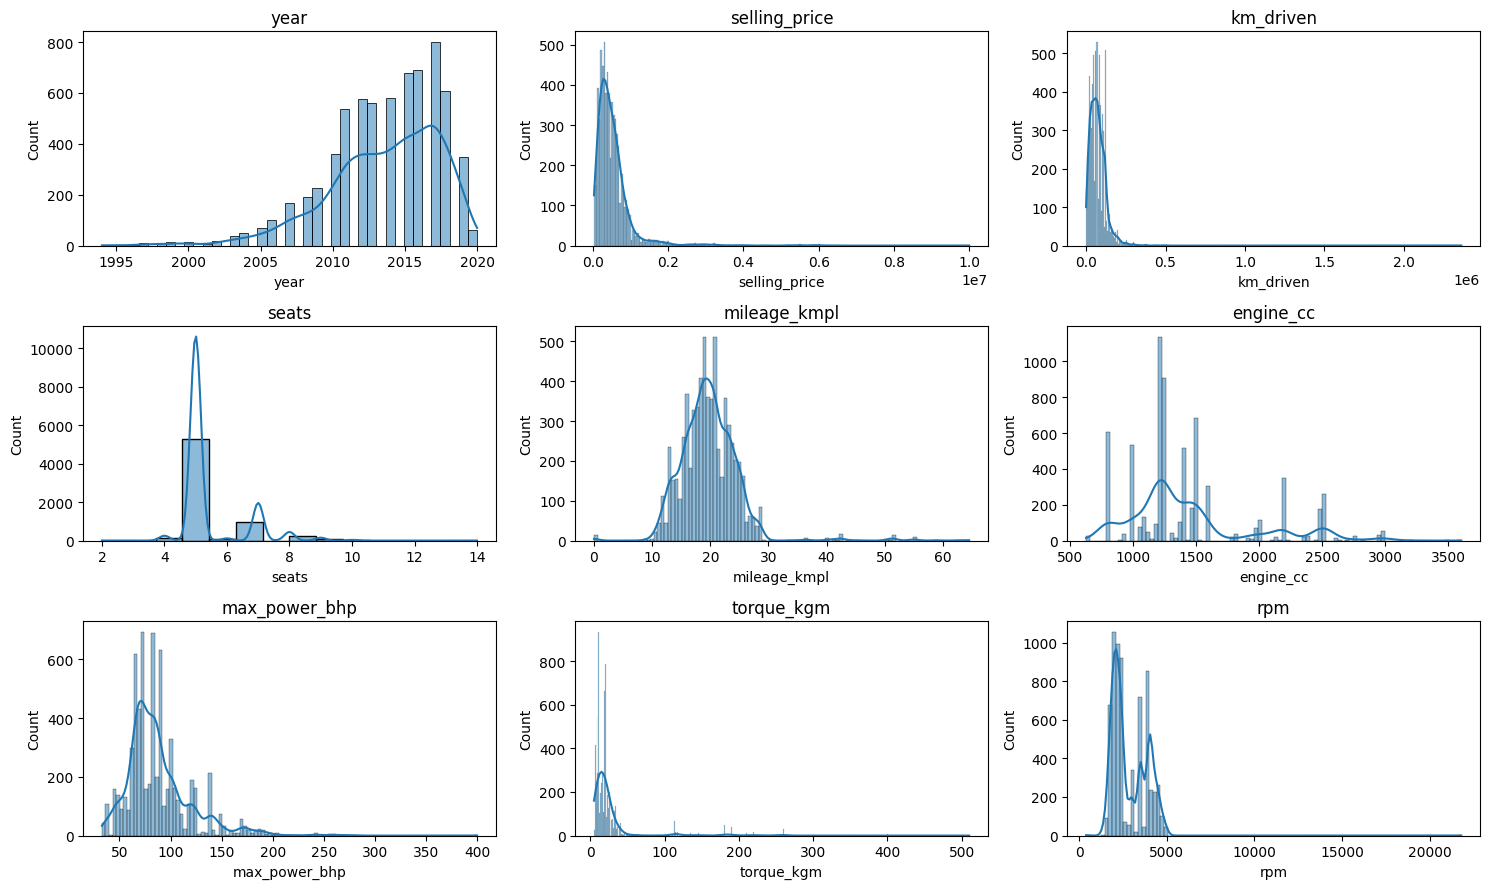

In [36]:
to_numeric_ = ["year", "selling_price", "km_driven", 'seats', "mileage_kmpl", "engine_cc", "max_power_bhp", "torque_kgm","rpm"]

num_rows = 3
num_cols = 3

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(to_numeric_):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


<ipython-input-37-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

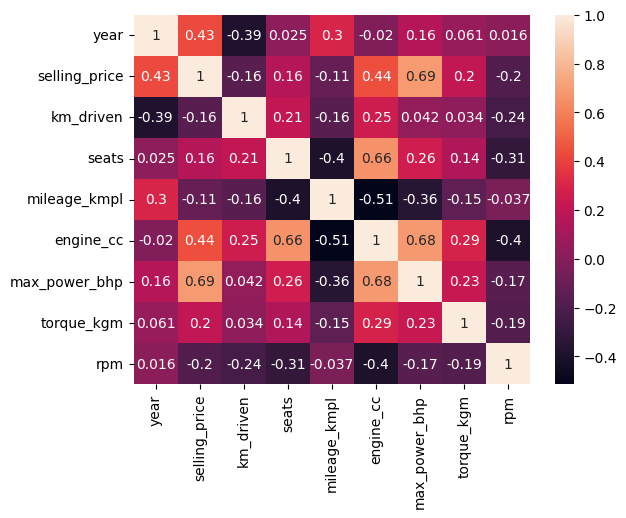

In [37]:
sns.heatmap(df.corr(),annot=True)

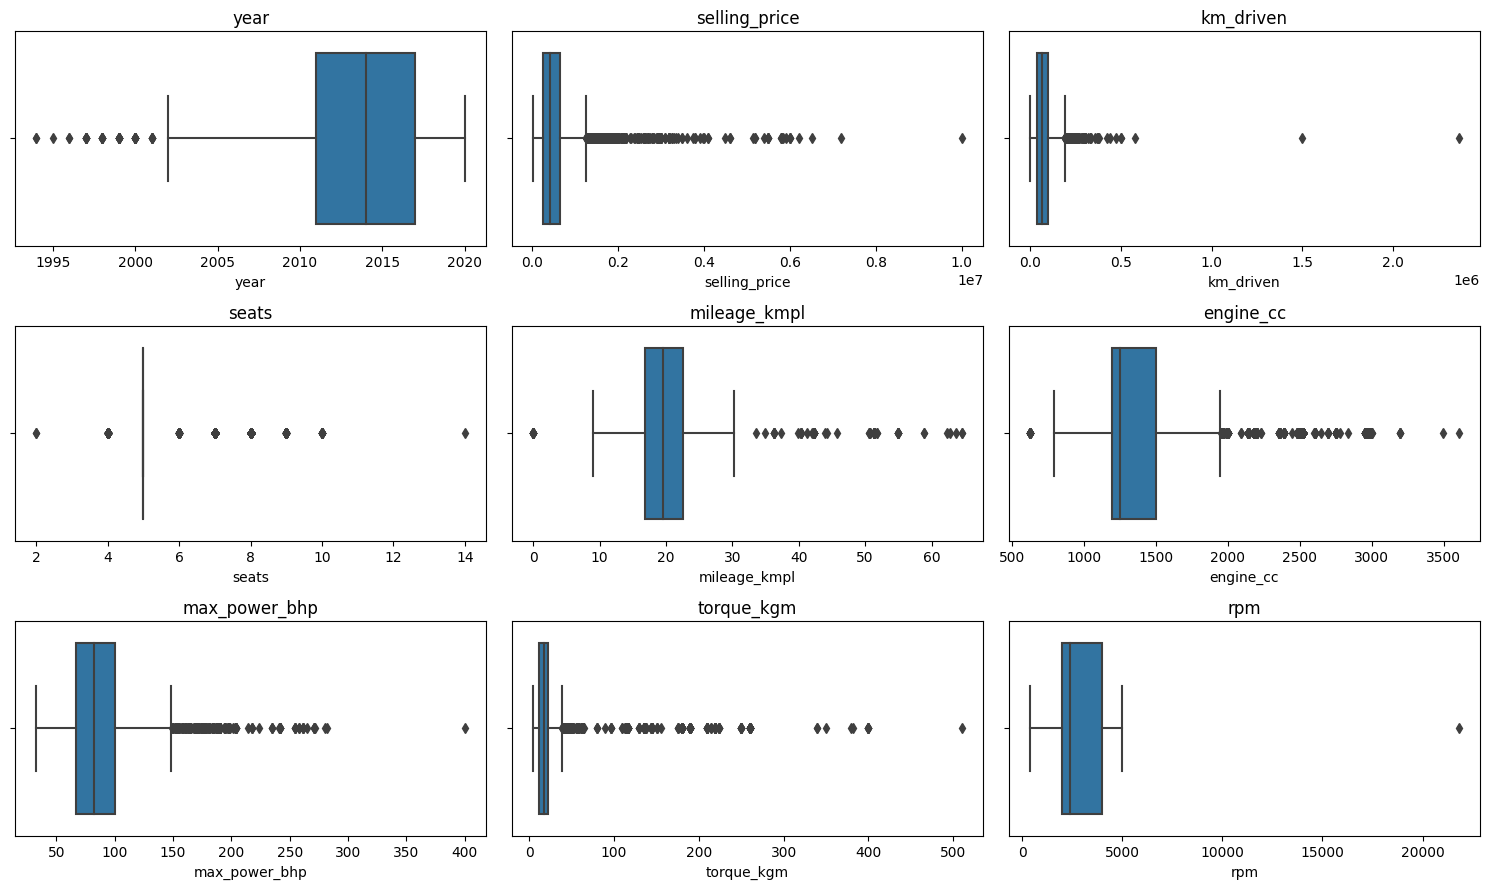

In [38]:
num_rows = 3
num_cols = 3

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(to_numeric_):
    sns.boxplot(data= df,x = col,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [39]:

def ranges(column,quant_1,quant_3):

    q1 = np.percentile(column,quant_1)
    q3 = np.percentile(column,quant_3)
    iqr = q3-q1

    ## higher bound:
    lower_bound = q1 = (1.5 * iqr)
    higher_bound = q3 + (1.5 * iqr)

    lower_bound = np.round(lower_bound,2)
    higher_bound = np.round(higher_bound,2)


    print(f"Q1 ({quant_1} percentile){q1}")
    print(f"Q3 ({quant_3} percentile){q3}")
    print(f"inter qantile range: {iqr}")
    print(f"lower_fence:{lower_bound}")
    print(f"higher_fence:{higher_bound}")


In [40]:
### deciding range for km_driven:
## quntile range
km = df['km_driven']
quant_1 = 25
quant_3 = 75

ranges(km,quant_1,quant_3)


Q1 (25 percentile)93000.0
Q3 (75 percentile)100000.0
inter qantile range: 62000.0
lower_fence:93000.0
higher_fence:193000.0


Datapoint greater then higher range
year             161
selling_price    161
km_driven        161
fuel             161
seller_type      161
transmission     161
owner            161
seats            161
mileage_kmpl     161
engine_cc        161
max_power_bhp    161
torque_kgm       161
rpm              161
dtype: int64


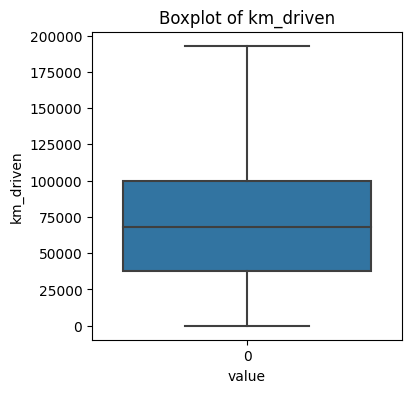

In [41]:
print("Datapoint greater then higher range")
print(df[km > 193000.0].count())


km_range_cutoff = 193000.0
for i in range(len(df.km_driven)):
    if df["km_driven"].values[i] > km_range_cutoff:
        df["km_driven"].values[i] = km_range_cutoff



## ploting boxplot:
plt.figure(figsize=(4,4))
sns.boxplot(df.km_driven)
plt.xlabel('value')
plt.ylabel('km_driven')
plt.title('Boxplot of km_driven');

In [42]:
### deciding range for selling_price:
## quntile range
sell = df['selling_price']
quant_1 = 20
quant_3 = 80

ranges(sell,quant_1,quant_3)

Q1 (20 percentile)720000.0
Q3 (80 percentile)700000.0
inter qantile range: 480000.0
lower_fence:720000.0
higher_fence:1420000.0


In [43]:
print("Datapoint greater then higher range")
print(df[sell > 1420000.0].count())

Datapoint greater then higher range
year             253
selling_price    253
km_driven        253
fuel             253
seller_type      253
transmission     253
owner            253
seats            253
mileage_kmpl     253
engine_cc        253
max_power_bhp    253
torque_kgm       253
rpm              253
dtype: int64


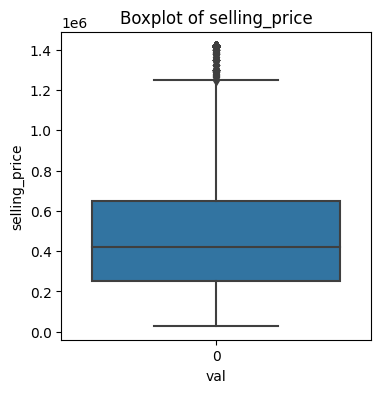

In [44]:
selling_range_cutoff =  1420000.0

for i in range(len(df.selling_price)):
    if df["selling_price"].values[i] > selling_range_cutoff:
        df["selling_price"].values[i] = selling_range_cutoff


## ploting boxplot:
plt.figure(figsize=(4,4))
sns.boxplot(df.selling_price)
plt.xlabel('val')
plt.ylabel('selling_price')
plt.title('Boxplot of selling_price');

<Axes: xlabel='selling_price', ylabel='Count'>

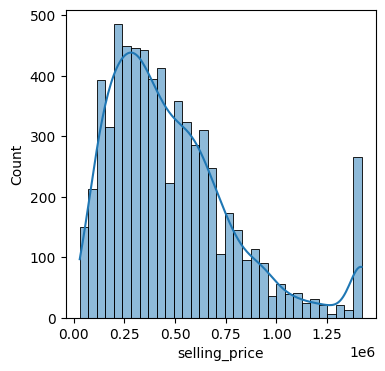

In [45]:
plt.figure(figsize=(4,4))
sns.histplot(df['selling_price'], kde=True,)

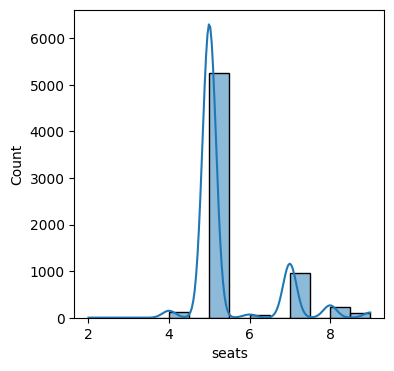

In [46]:
seats_range_cutoff = 9


for i in range(len(df.seats)):
    if df["seats"].values[i] > seats_range_cutoff:
        df["seats"].values[i] = seats_range_cutoff


## ploting boxplot:
## ploting
plt.figure(figsize=(4,4))
sns.histplot(df['seats'], kde=True);

In [47]:
### deciding range for mileage:
## quntile range
mileage = df['mileage_kmpl']
quant_1 = 25
quant_3 = 85

ranges(mileage,quant_1,quant_3)

Q1 (25 percentile)10.724999999999998
Q3 (85 percentile)23.95
inter qantile range: 7.149999999999999
lower_fence:10.72
higher_fence:34.67


In [48]:
df[df.mileage_kmpl>34.40].count()

year             70
selling_price    70
km_driven        70
fuel             70
seller_type      70
transmission     70
owner            70
seats            70
mileage_kmpl     70
engine_cc        70
max_power_bhp    70
torque_kgm       70
rpm              70
dtype: int64

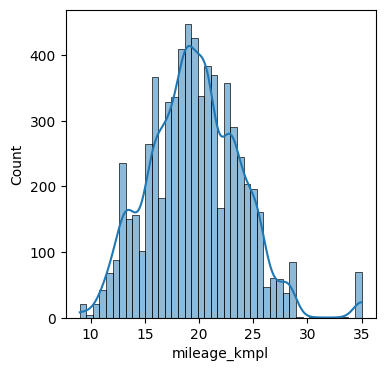

In [49]:
mile_min_range_cutoff = 9
mile_max_range_cutoff = 35

for i in range(len(df.mileage_kmpl)):
    if df["mileage_kmpl"].values[i] > mile_max_range_cutoff:
        df["mileage_kmpl"].values[i] = mile_max_range_cutoff

    elif df["mileage_kmpl"].values[i] < mile_min_range_cutoff:
        df["mileage_kmpl"].values[i] = mile_min_range_cutoff




## ploting boxplot:
## ploting
plt.figure(figsize=(4,4))
sns.histplot(mileage, kde=True);

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6717.0,2013.611136,3.897402,1994.0,2011.0,2014.00,2017.00,2020.0
selling_price,6717.0,487408.478487,318296.193311,29999.0,250000.0,420000.00,650000.00,1420000.0
km_driven,6717.0,71633.997767,43625.945858,1.0,38000.0,68203.00,100000.00,193000.0
seats,6717.0,5.430847,0.968006,2.0,5.0,5.00,5.00,9.0
mileage_kmpl,6717.0,19.633220,4.226991,9.0,16.8,19.61,22.54,35.0
engine_cc,6717.0,1430.985857,493.469198,624.0,1197.0,1248.00,1498.00,3604.0
max_power_bhp,6717.0,87.766100,31.724555,32.8,67.1,81.83,100.00,400.0
torque_kgm,6717.0,24.921654,37.492920,4.8,11.4,17.55,22.40,510.0
rpm,6717.0,2864.614486,980.486359,400.0,2000.0,2400.00,4000.00,21800.0


In [51]:
### deciding range for engine cc:
## quntile range
engine_cc = df['engine_cc']
quant_1 = 30
quant_3 = 85

ranges(engine_cc,quant_1,quant_3)


Q1 (30 percentile)1201.5
Q3 (85 percentile)1998.0
inter qantile range: 801.0
lower_fence:1201.5
higher_fence:3199.5


In [52]:
print("Datapoint less then higher range")
print(df[df.engine_cc > 2702.0].count())

Datapoint less then higher range
year             116
selling_price    116
km_driven        116
fuel             116
seller_type      116
transmission     116
owner            116
seats            116
mileage_kmpl     116
engine_cc        116
max_power_bhp    116
torque_kgm       116
rpm              116
dtype: int64


In [53]:
print("Datapoint less then higher range")
print(df[df.engine_cc < 750.5].count())

Datapoint less then higher range
year             25
selling_price    25
km_driven        25
fuel             25
seller_type      25
transmission     25
owner            25
seats            25
mileage_kmpl     25
engine_cc        25
max_power_bhp    25
torque_kgm       25
rpm              25
dtype: int64


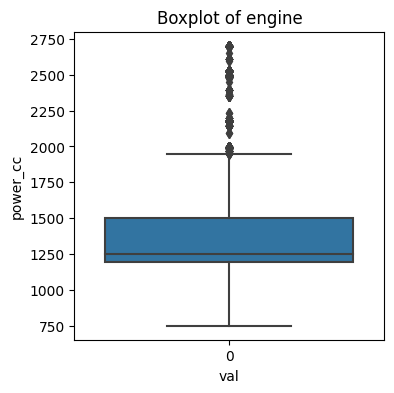

In [54]:
### handling engine cc
engine_min_range_cutoff = 750
engine_max_range_cutoff = 2702

for i in range(len(df.mileage_kmpl)):
    if df["engine_cc"].values[i] > engine_max_range_cutoff:
        df["engine_cc"].values[i] = engine_max_range_cutoff

    elif df["engine_cc"].values[i] < engine_min_range_cutoff:
        df["engine_cc"].values[i] = engine_min_range_cutoff

## ploting boxplot:
## ploting
plt.figure(figsize=(4,4))
sns.boxplot(df.engine_cc)
plt.xlabel('val')
plt.ylabel('power_cc')
plt.title('Boxplot of engine');

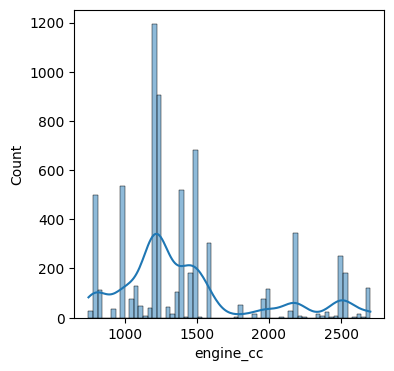

In [55]:
#histplot
plt.figure(figsize=(4,4))
sns.histplot(df.engine_cc, kde=True);

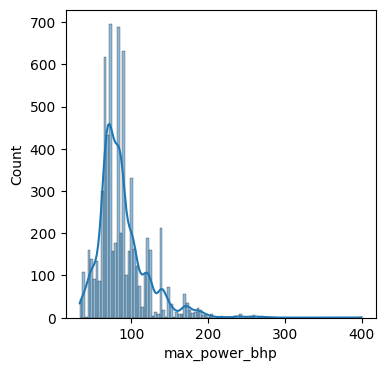

In [56]:
plt.figure(figsize=(4,4))
sns.histplot(df.max_power_bhp, kde=True);

In [57]:
df[df.max_power_bhp > 220].count()

year             31
selling_price    31
km_driven        31
fuel             31
seller_type      31
transmission     31
owner            31
seats            31
mileage_kmpl     31
engine_cc        31
max_power_bhp    31
torque_kgm       31
rpm              31
dtype: int64

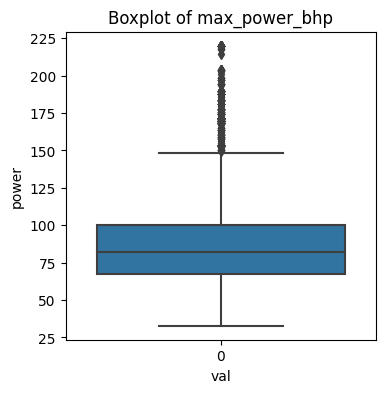

In [58]:
## handling the max_power bhp
max_power_max_range_cutoff = 220

for i in range(len(df.max_power_bhp)):
    if df["max_power_bhp"].values[i] > max_power_max_range_cutoff:
        df["max_power_bhp"].values[i] = max_power_max_range_cutoff


## ploting boxplot:
## ploting
plt.figure(figsize=(4,4))
sns.boxplot(df.max_power_bhp)
plt.xlabel('val')
plt.ylabel('power')
plt.title('Boxplot of max_power_bhp');

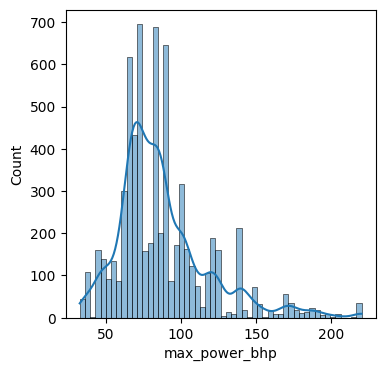

In [59]:
plt.figure(figsize=(4,4))
sns.histplot(df.max_power_bhp, kde=True);

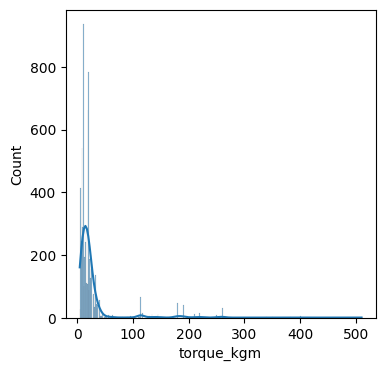

In [60]:
#### handling torque_kgm:
plt.figure(figsize=(4,4))
sns.histplot(df.torque_kgm, kde=True);

In [61]:
df[df.torque_kgm > 220].count()

year             56
selling_price    56
km_driven        56
fuel             56
seller_type      56
transmission     56
owner            56
seats            56
mileage_kmpl     56
engine_cc        56
max_power_bhp    56
torque_kgm       56
rpm              56
dtype: int64

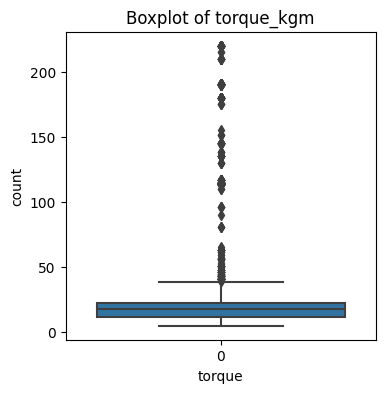

In [62]:
## handling the max_power bhp
cutoff = 220
for i in range(len(df.torque_kgm)):
    if df["torque_kgm"].values[i] > cutoff:
        df["torque_kgm"].values[i] = cutoff


## ploting boxplot:
## ploting
plt.figure(figsize=(4,4))
sns.boxplot(df.torque_kgm)
plt.xlabel('torque')
plt.ylabel('count')
plt.title('Boxplot of torque_kgm');

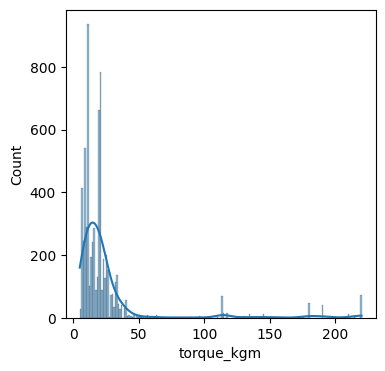

In [63]:
#### handling torque_kgm:
plt.figure(figsize=(4,4))
sns.histplot(df.torque_kgm, kde=True);

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6717.0,2013.611136,3.897402,1994.0,2011.0,2014.00,2017.00,2020.0
selling_price,6717.0,487408.478487,318296.193311,29999.0,250000.0,420000.00,650000.00,1420000.0
km_driven,6717.0,71633.997767,43625.945858,1.0,38000.0,68203.00,100000.00,193000.0
seats,6717.0,5.430847,0.968006,2.0,5.0,5.00,5.00,9.0
mileage_kmpl,6717.0,19.633220,4.226991,9.0,16.8,19.61,22.54,35.0
engine_cc,6717.0,1427.290606,480.526295,750.0,1197.0,1248.00,1498.00,2702.0
max_power_bhp,6717.0,87.591366,30.814253,32.8,67.1,81.83,100.00,220.0
torque_kgm,6717.0,24.393050,33.687235,4.8,11.4,17.55,22.40,220.0
rpm,6717.0,2864.614486,980.486359,400.0,2000.0,2400.00,4000.00,21800.0


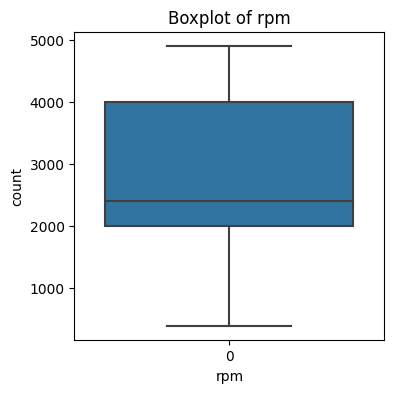

In [65]:
## handling the rpm
rpm_cutoff = 4900
for i in range(len(df.rpm)):
    if df["rpm"].values[i] > rpm_cutoff:
        df["rpm"].values[i] = rpm_cutoff


## ploting boxplot:
## ploting
plt.figure(figsize=(4,4))
sns.boxplot(df.rpm)
plt.xlabel('rpm')
plt.ylabel('count')
plt.title('Boxplot of rpm');

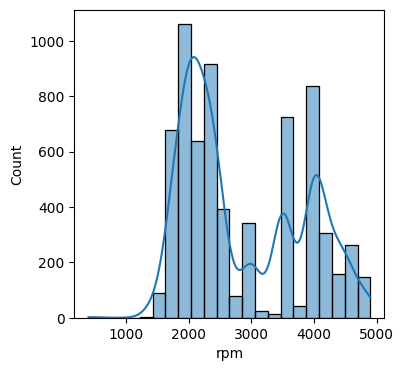

In [66]:
#### handling torque_kgm:
plt.figure(figsize=(4,4))
sns.histplot(df.rpm, kde=True);

___
___
___


## spliting the data into feature and target:

In [67]:
df.sample(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_kgm,rpm
290,2017,450000,35000,Petrol,Individual,Manual,First Owner,5.0,18.90,1197.0,82.00,11.63,4000.0
1387,2016,575000,53000,Diesel,Dealer,Manual,First Owner,5.0,22.54,1396.0,88.73,22.42,2125.0
2694,2013,479000,173000,Diesel,Individual,Manual,First Owner,7.0,12.05,2179.0,120.00,29.59,2300.0


In [68]:
features = df.drop("selling_price",axis =1)
target = df["selling_price"]

In [69]:
print("shape",features.shape)
features.sample(5)


shape (6717, 12)


,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_kgm,rpm
5600,2007,100750,Petrol,Individual,Manual,Second Owner,5.0,16.10,1298.0,88.2,11.50,4500.0
2420,2019,10000,Petrol,Individual,Manual,First Owner,5.0,22.50,999.0,67.0,9.29,4250.0
6061,2008,193000,Petrol,Individual,Manual,Second Owner,5.0,19.70,796.0,46.3,6.33,3000.0
6389,2014,11500,Diesel,Individual,Manual,First Owner,9.0,15.96,2523.0,63.0,18.37,1470.0
2997,2011,175000,Diesel,Individual,Manual,Second Owner,5.0,21.10,1248.0,73.9,19.39,2000.0


In [70]:
a = pd.DataFrame(target)
print("shape",a.shape)

a.sample(5)

shape (6717, 1)


,selling_price
3157,175000
137,1420000
5428,140000
3336,600000
4184,250999


## converting features frame categoical data column to numerical


In [71]:
## segregating the data into numerical and categories:
# Initialize an empty list to store numeric column names
numericals = []
categories = []
# Iterate through columns and check if they are numeric
for i in features.columns:
    if pd.api.types.is_numeric_dtype(data[i]):
        numericals.append(i)
    else:
        categories.append(i)

print("numerical", numericals)
print("categories",categories)

numerical ['year', 'km_driven', 'seats', 'mileage_kmpl', 'engine_cc', 'max_power_bhp', 'torque_kgm', 'rpm']
categories ['fuel', 'seller_type', 'transmission', 'owner']


In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

#creating Transformers:
categorical_transformer = OneHotEncoder(sparse_output=False)
numeric_transformer = StandardScaler()

# Creating the ColumnTransformer
preprocessor = ColumnTransformer( transformers=
                                 [ ('cat', categorical_transformer, categories),
                                   ('num', numeric_transformer, numericals)],
    remainder='passthrough')  # This includes columns not specified in transformer

In [73]:
X = preprocessor.fit_transform(features)

In [74]:
# Getting the column names for the one-hot encoded features
encoded_categories_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features = categories)

# Getting the names of the numeric columns (they remain the same)
numeric_column_names = numericals

# Combine the names of one-hot encoded and numeric columns
transformed_column_names = list(encoded_categories_column_names) + numeric_column_names

transformed_x = pd.DataFrame(X, columns=transformed_column_names)

In [75]:
transformed_x.sample()

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,...,owner_Test Drive Car,owner_Third Owner,year,km_driven,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_kgm,rpm
150,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.126184,-1.229497,-0.44512,-1.086722,1.173196,3.096481,0.184563,-0.274847


## lets perform the train test split:

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,target, test_size = 0.2, random_state = 42)

print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))

shape of x_train(5373, 22) and have dimension: 2
shape of y_train(5373,) and have dimension: 1
shape of x_test(1344, 22)  and have dimension: 2
shape of y_test(1344,) and have dimension: 2


In [85]:
# importing ridge
from sklearn.linear_model import Ridge

# Fitting the model to your training data
model = Ridge()
model_ridge = model.fit(x_train, y_train)

In [86]:
# coefficients indicate the impact of each feature on the predicted target variable.
coefficients = model_ridge.coef_
print(coefficients)

[-40004.55696552 -15410.20761785  77360.06075284 -21945.29617017
   3633.28474076 -29528.32183743  25895.03709634  60538.81127144
 -60538.81126994   9886.27862323 -36382.90492406 -35741.13899408
  99645.09939559 -37407.33410086 132732.0885165  -38822.16064282
   5521.6655393   -8976.19610209  36525.84367996 144640.13169543
  -7191.75562313 -54872.30590385]


Note :
These coefficients indicate how much the target variable is expected to change for a one-unit change in each corresponding feature, assuming all other features remain constant.


In [87]:
## making predictions :
y_pred = model_ridge.predict(x_test)

In [89]:
# NOTE:  The intercept term represents the predicted value of the target variable when all feature variables are zero.
model_ridge.intercept_

590019.699747784

- the "intercept" refers to the value where the regression line crosses the y-axis.
- It represents the predicted value of the dependent variable (y) when all independent variables (x) are set to zero.

In [90]:
## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""

result = pd.DataFrame({'Actual': y_test, 'Predict' : np.round(y_pred)})
result.sample(10)

y_pred dimensions : 1
y_test dimension : 1


,Actual,Predict
2838,680000,718414.0
4945,1420000,1115243.0
3402,181000,290702.0
5936,780000,555487.0
5965,31000,-269590.0
1369,950000,918970.0
4702,450000,302952.0
7894,650000,644358.0
105,625000,856426.0
2505,100000,2413.0


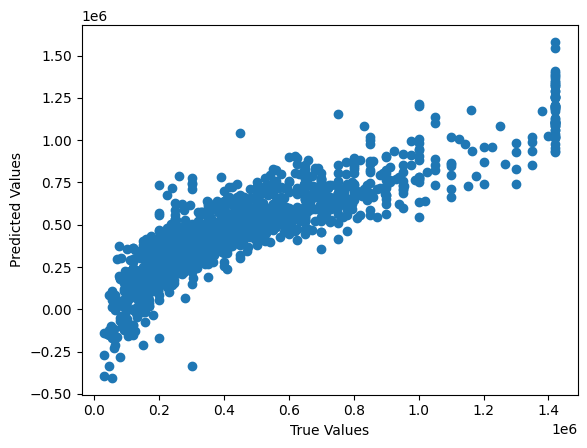

In [91]:
## plot of y_pred and y_test
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


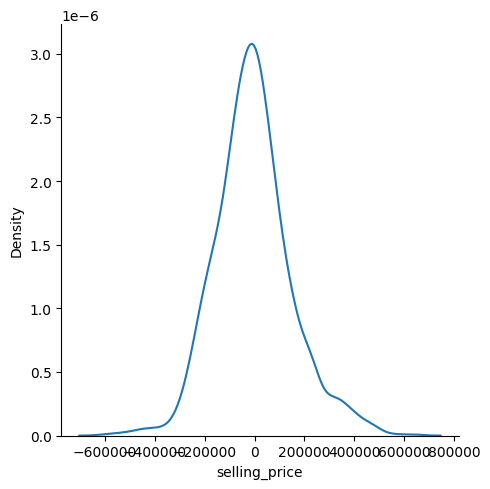

In [93]:
residual = y_test - y_pred

sns.displot(residual,kind="kde")

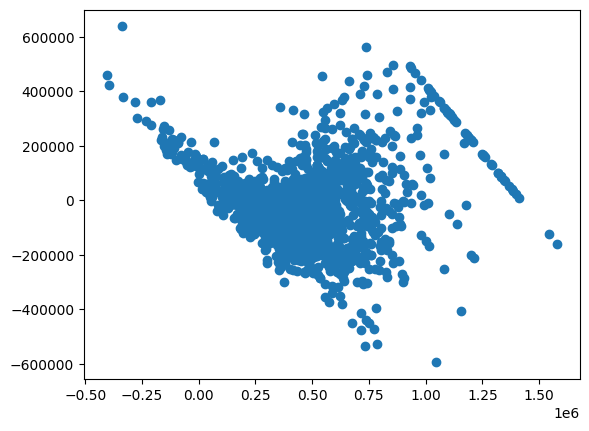

In [94]:
plt.scatter(y_pred,residual)


In [95]:

## importing performance matrics

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


## performance matric mean square error:
mse = mse(y_test,y_pred)
print(f"mean_square_error : {mse}")

## Root mean squared error:
rmse = np.sqrt(mse)
print(f"Root_mean_squared_error:{(rmse)}")
## performance matric mean absolute error:
mae = mae(y_test,y_pred)
rounded_mae = round(mae, 1)
print(f"mean_absolute_error : {rounded_mae}")

mean_square_error : 23324730118.399986
Root_mean_squared_error:152724.35993776497
mean_absolute_error : 115116.6


## perfomance matrics:

In [97]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
p=22
n=len(y_test)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {np.round(adjusted_r_squared,2)}")


R-squared: 0.7708451116889162
Adjusted R-squared: 0.77


___
___

Lasso Regression

In [101]:
from sklearn import linear_model
clf = linear_model.Lasso()
clf_model = clf.fit(x_train, y_train)
print(clf_model.coef_)
print(clf_model.intercept_)

[-19920.25923474   5361.4252638  101144.69753834  -1247.84240202
  19619.55701634 -13372.63585342  42904.34262359 121047.71941612
     -0.          45687.52132387   -891.08348242      0.
 159238.44518655  -1747.11966704 132764.98741922 -38804.05707559
   5507.85497517  -9056.50292402  36478.1381907  144616.82546978
  -7193.36377596 -54901.92036186]
456807.8469276261


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e+11, tolerance: 5.435e+10
  model = cd_fast.enet_coordinate_descent(


In [102]:
## making predictions :
y_pred = clf_model.predict(x_test)

In [103]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : np.round(y_pred)})
result.sample(10)

,Actual,Predict
7655,1000000,945032.0
5443,459999,558250.0
8036,432000,507503.0
3313,650000,519367.0
3858,300000,334033.0
5177,365000,391129.0
2787,325000,323949.0
7911,320000,334948.0
2421,180000,327619.0
5988,200000,158108.0


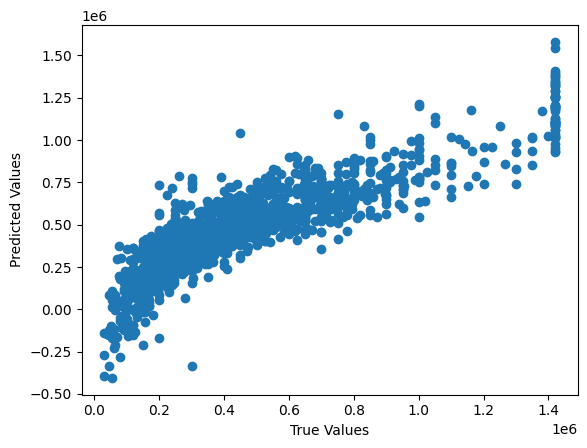

In [104]:
## plot of y_pred and y_test
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [105]:

## importing performance matrics

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


## performance matric mean square error:
mse = mse(y_test,y_pred)
print(f"mean_square_error : {mse}")

## Root mean squared error:
rmse = np.sqrt(mse)
print(f"Root_mean_squared_error:{(rmse)}")
## performance matric mean absolute error:
mae = mae(y_test,y_pred)
rounded_mae = round(mae, 1)
print(f"mean_absolute_error : {rounded_mae}")

mean_square_error : 23315146982.433968
Root_mean_squared_error:152692.982754395
mean_absolute_error : 115105.7


In [106]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
p=22
n=len(y_test)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {np.round(adjusted_r_squared,2)}")


R-squared: 0.7709392616508157
Adjusted R-squared: 0.77


---


# Ridge regression
It's a form of linear regression that includes a penalty term to prevent overfitting and stabilize the model.
ie, Ridge regression is used to reduce the overfitting.

**MAE = <span>∑<sup>n</sup><sub>i=1</sub></span> (&#40;h&#952;(x<sub>i</sub>) - y<sub>i</sub>)<sup>2</sup> / n**
- it is a cost function that we use in regression problems along with we add hyperparameter **λ** (slope)<sup>2</sup>


it can expressed as :
**<span>∑<sup>n</sup><sub>i=1</sub></span> (&#40;h&#952;(x<sub>i</sub>) - y<sub>i</sub>)<sup>2</sup> / n + λ <span>∑<sup>n</sup><sub>i=1</sub></span>(slope)<sup>2</sup>**

   where :
 - (λ) is Hyperparameter
 - slope is (θ<sub>i</sub>)

## Hyperparameter (λ):

λ controls the strength of the penalty term.

Larger values of λ lead to more coefficients being shrunk towards zero.

![lambda shift](https://github.com/MANOJ-S-NEGI/Machine_learning_regression/assets/99602627/66756aed-9359-4a41-8a86-2e60ff809fbe)



- The Global minima shifts up and the slope decreases.
- λ will never become zero
- what is shown in plot λ = 0 is the cost function (mean square error)
- (λ) and (θ) are inversely proportion

which we can conclude as the hyperparameter (λ) increases the slope (θ) decreases and vice versa

**Shifting of Hyperparameter to reduce the overfitting**

![download (3)](https://github.com/MANOJ-S-NEGI/Machine_learning_regression/assets/99602627/3a035f56-e459-45c4-81d1-1998b12716c5)

---
---


# Lasso Regression: [Least Absolute Shrinkage and Selection Operator]



it can expressed as :
**<span>∑<sup>n</sup><sub>i=1</sub></span> (&#40;h&#952;(x<sub>i</sub>) - y<sub>i</sub>)<sup>2</sup> / n + λ <span>∑<sup>n</sup><sub>i=1</sub></span>|(slope)|**


![download (2)](https://github.com/MANOJ-S-NEGI/Machine_learning_regression/assets/99602627/45f44865-5303-430c-86e8-241f8cf74559)

- It's a regularization method that helps to prevent the outliner in the dataset.

- **Feature Selection**: Lasso performs both feature selection and parameter shrinkage.<br>
It encourages the model to use fewer features by driving the coefficients of <br>less important features toward zero.

- **Regularization**: Lasso adds a penalty term to the regression equation, which discourages overly complex models by shrinking the coefficients of less influential predictors.


**Hyperparameter**
Hyperparameter (λ):

- (λ) controls the strength of the penalty term.<br>
 Larger values of (λ) lead to more coefficients being shrunk towards zero.

- Choosing an appropriate Hyperparameter (λ) is crucial. Cross-validation techniques are often used to find the best value.

![download (3)](https://github.com/MANOJ-S-NEGI/Machine_learning_regression/assets/99602627/7bf63f37-5342-4d4b-8ef1-8a5e56022603)

Illustration: h<sub>&#952;</sub>(x) = &#952;<sub>0</sub> + &#952;<sub>1</sub>x<sub>1</sub> + &#952;<sub>2</sub>x<sub>2</sub> + &#952;<sub>3</sub>x<sub>3</sub><br>
 =  &#952;<sub>0</sub> + 0.54 <sub>x</sub> + 0.23 x<sub>2</sub> + 0.10 x<sub>3</sub>

 here, 0.10 x<sub>3</sub> keeps on reducing as the hyperparameter increases and eventually becomes zero.

![download (1)](https://github.com/MANOJ-S-NEGI/Machine_learning_regression/assets/99602627/b59f005a-398f-4c96-b111-1eeccce4926f)

**If the coefficients become zero it will automatically make some features near to zero or in reduced form.**

|**Advantages**|**Limitations**|
|:-|:-|
|-**Feature Selection**: <br><br>Lasso can automatically select the most relevant features,<br><br>making it useful for datasets with a large number of potential predictors.|- **Correlated Predictors**:<br><br> When predictors are highly correlated, <br><br>Lasso tends to arbitrarily select one and ignore the others.|



<br><br><br><br><br><br>
---
---